<h1>Categorical Encoding notebook
<h4>Author:Moamen Nssar

Categorical Encoding is a process where we transform categorical data into numerical data,so that the data with converted categorical values can be provided to the models to give and improve the predictions.As we know,most of the machine learning models work with integer values only and some with other different values which can be understandable for the model. All models basically perform mathematical operations which can be performed using different tools and techniques.
<br>
<h6>There are two kinds of categorical data:</h6>
  1-Nominal data: nominal data describes variables with categories that do not have a natural order or ranking
  
       Example of nominal data :countries("Egypt","Algeria","China")
   
  2-Ordinal data: ordinal data is one where the order matters,it has a predetermined or natural order.
  
      Example of ordinal data :economic status (“low income”,”middle income”,”high income”)

<h6>Now let's get into Categorical Encoding techniques</h6>

<h4>1. One-Hot Encoding (OHE)</h4>

One-Hot Encoding or OHE is a technique that transforms all the elements on a categorical column into new columns represented by 0 or 1 (binary values) to signify the presence of the category value. it can be done by using OneHotEncoder() from sklearn or using get_dummies() from pandas library 

In [55]:
#create data
data=pd.DataFrame({'height':['tall','medium','short','tall','medium','short','tall','medium','short',]})
data

,height
0,tall
1,medium
2,short
3,tall
4,medium
5,short
6,tall
7,medium
8,short


In [49]:
#first using OneHotEncoder()
from sklearn import preprocessing
ohe=preprocessing.OneHotEncoder(handle_unknown='ignore')
#apply OneHotEncoder to data
encoded_data=pd.DataFrame(ohe.fit_transform(data).toarray())
encoded_data

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0
6,0.0,0.0,1.0
7,1.0,0.0,0.0
8,0.0,1.0,0.0


In [56]:
#show names of columns because OneHotEncoder() shows them as numbers
encoded_data.columns = ohe.get_feature_names(['height'])
# use inplace=True with drop() to remove height column
data.drop(['height'] ,axis=1)
encoded_data= pd.concat([data,encoded_data ], axis=1)
encoded_data

,height,height_medium,height_short,height_tall
0,tall,0.0,0.0,1.0
1,medium,1.0,0.0,0.0
2,short,0.0,1.0,0.0
3,tall,0.0,0.0,1.0
4,medium,1.0,0.0,0.0
5,short,0.0,1.0,0.0
6,tall,0.0,0.0,1.0
7,medium,1.0,0.0,0.0
8,short,0.0,1.0,0.0


In [58]:
#second way using get_dummies() 
import pandas as pd 
#apply get_dummies()to data
encoded_data=pd.get_dummies(data)
encoded_data

,height_medium,height_short,height_tall
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0
5,0,1,0
6,0,0,1
7,1,0,0
8,0,1,0


<h6>OneHotEncoder vs get_dummies</h6>

OHE does the same as get_dummies but in addition, OHE saves the exploded categories into it's object.
Saving exploded categories is extremely useful when I want to apply the
same data pre-processing on my test set. If the total number of unique
values in a categorical column is not the same for train set vs test set,I'm
going to have problems.

<h7>Notice the following:</h7>

First one using get_dummies() 

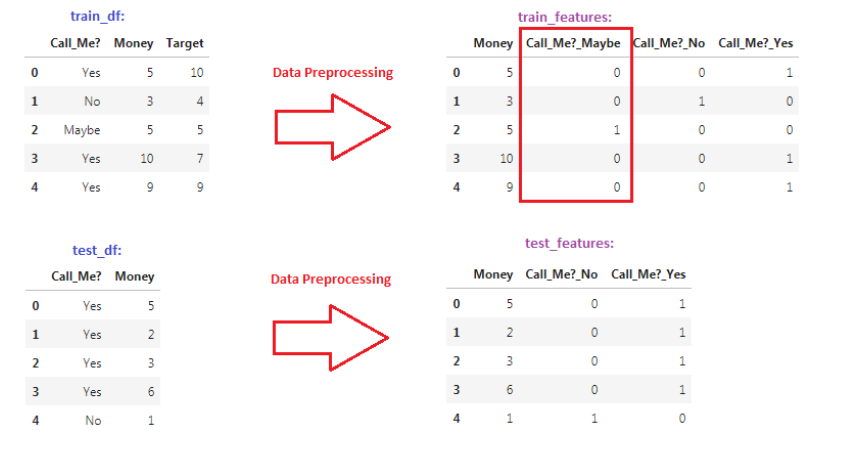

Second one using OneHotEncoder():
it made a column in testdata filled with zeros.so features of train and test data will be the same.Moreover,I’ll have a problem if I fit a model on the training set and predict on test set with features of different shape
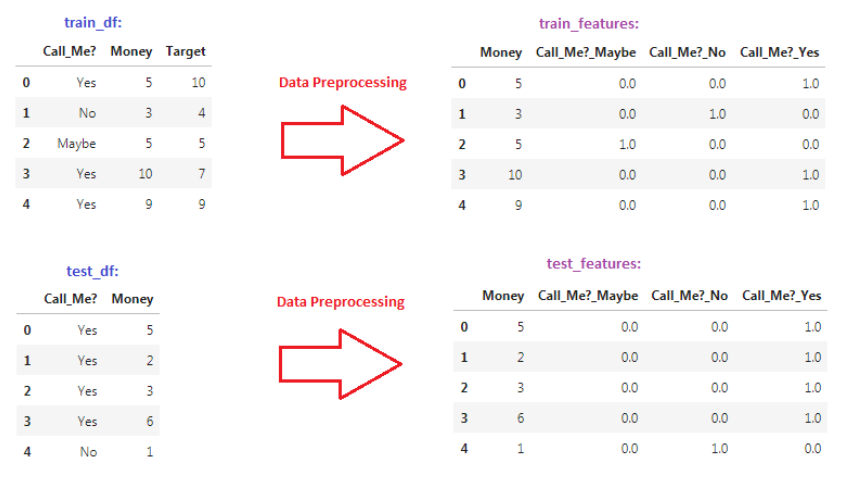



<h4>2.Label Encoding</h4>
This process transforms categorical column elements into numerical values without any additional column. 

In [63]:
le = preprocessing.LabelEncoder()
data['height']=le.fit_transform(data['height'])
data

,height
0,2
1,0
2,1
3,2
4,0
5,1
6,2
7,0
8,1


<h6>Be careful</h6>label encoding might induces a new problem since it uses number sequencing. The problem using the number is that they introduce relation/comparison between them.The algorithm might misunderstand that data has some kind of hierarchy/order 0 < 1 < 2, so be careful while using this this.

<h6>The question now is which technique should be used.</h6>

This question generally depends on your dataset and the model which you wish to apply. But still, a few points to note before choosing the right encoding technique for your model:

We apply One-Hot Encoding when:

    1-The categorical feature is not ordinal 
    2-The number of categorical features is less so one-hot encoding can be effectively applied
We apply Label Encoding when:

    1-The categorical feature is ordinal 
    2-The number of categories is quite large as one-hot encoding can lead to high memory consumption    